<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №3

In [64]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
import random
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr

Загрузить датасет по url:


In [65]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [66]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [67]:
# посмотрим есть ли пропуски в данных
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [68]:
# т.к. датасет имеет достаточно данных для анализа, удалим пропуски
df = df.dropna()

In [69]:
freedom = df['Freedom']
pos_affect = df['Positive affect']

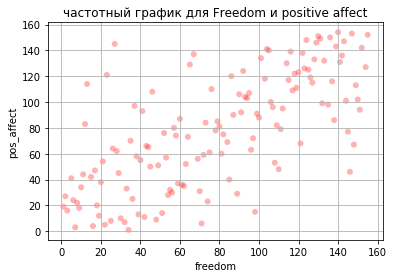

In [70]:
fig, ax = plt.subplots()
ax.scatter(freedom, pos_affect, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('freedom')
plt.ylabel('pos_affect')
plt.title('частотный график для Freedom и positive affect')
plt.show()

**Похоже на линейную корреляцию, позитивные эмоции находятся в прямой взаимосвязи от чувства свободы**

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [71]:
print('Медиана: ', statistics.median(freedom))
print('Мат ожидание: ', statistics.mean(freedom))
print('стандартное отклонение: ', statistics.pstdev(freedom))
print('дисперсия: ',  statistics.pvariance( freedom))
print('Min: ', min(freedom))
print('Max: ', max(freedom))
print('размах: ', max(freedom)-min(freedom))

Медиана:  79.5
Мат ожидание:  78.82857142857142
стандартное отклонение:  44.9475794449399
дисперсия:  2020.2848979591836
Min:  1.0
Max:  155.0
размах:  154.0


**Размах в пределах нормы, поэтому сделаем вывод, что выбросов нет**

Почему нельзя найти моду?

In [72]:
print('мода', statistics.mode(freedom))

StatisticsError: no unique mode; found 140 equally common values

**функция не выводит моду, потому что для нее нет уникального значения** 

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [73]:
corr, p_value = pearsonr(freedom, pos_affect)
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.6965670458090686


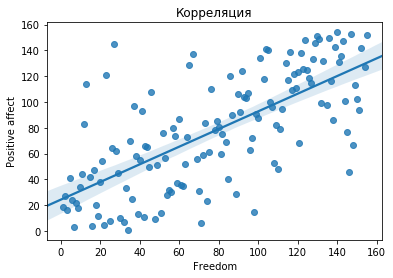

In [74]:
sns.regplot(x= freedom, y=pos_affect, data=df, fit_reg=True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Корреляция')
plt.show()

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [75]:
# Операция центрирования
freedom_1 = freedom - statistics.mean(freedom)

Масштабирование выборки

In [76]:
from sklearn import preprocessing 

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1),)
freedom_norm= min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1)) 
df_freedom_norm = pd.DataFrame(freedom_norm)
df_freedom_norm.head()

,0
0,-0.948052
1,-0.935065
2,-0.974026
3,-0.922078
4,-0.766234


Построить матрицу корреляций для всех колонок таблицы

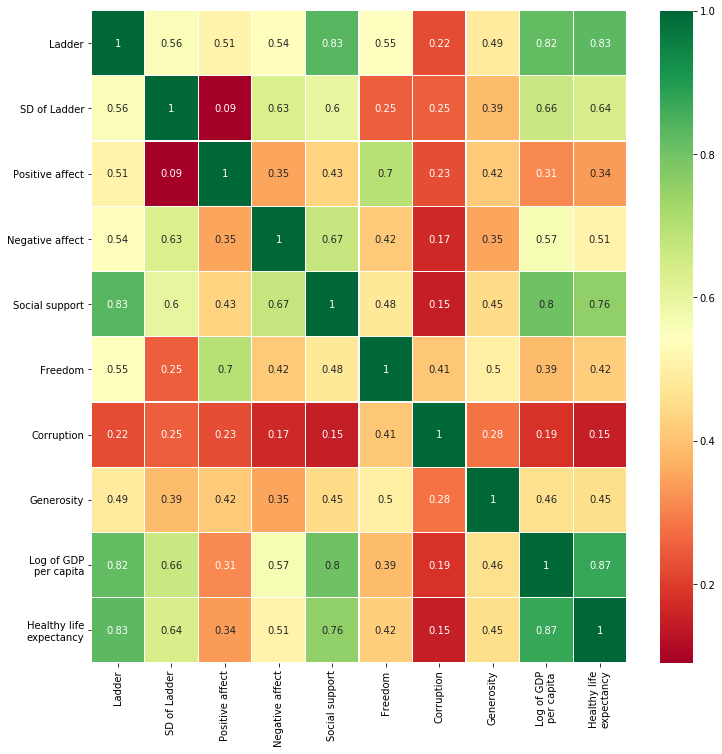

In [77]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

**Интересно, что уровень ВВП имеет самую низкую корреляцию  с позитивными эмоциями**

# Авокадо
Загрузить таблицу цен на авокадо: 

In [81]:
df=pd.read_csv('data/avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [82]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Сделать частотный график колонки AveragePrice. Какое это распределение?

**Очень похоже на Gamma distribution**

[Text(0,0.5,'Frequency'), Text(0.5,0,'AveragePrice Distribution')]

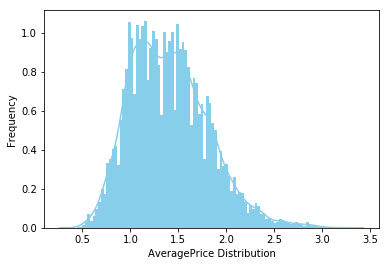

In [83]:
ax = sns.distplot(df.AveragePrice,
             kde=True,
             bins=100,
             color='skyblue',
             hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='AveragePrice Distribution', ylabel='Frequency')

[Text(0,0.5,'Frequency'), Text(0.5,0,'Gamma Distribution')]

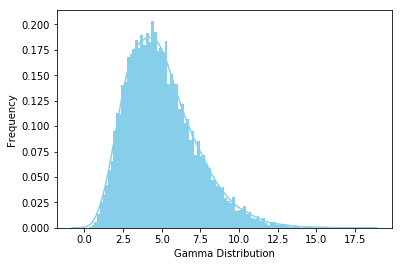

In [84]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)
ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [85]:
data = df.loc[:, df.columns.isin(['4046', '4225', '4770','AveragePrice'])]
data.head()

,AveragePrice,4046,4225,4770
0,1.33,1036.74,54454.85,48.16
1,1.35,674.28,44638.81,58.33
2,0.93,794.70,109149.67,130.50
3,1.08,1132.00,71976.41,72.58
4,1.28,941.48,43838.39,75.78


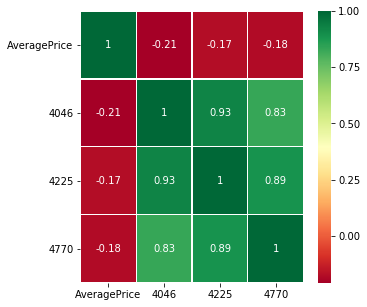

In [86]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(5,5)
plt.show()

Отрицательная корреляция со всеми типами авокадо и средней ценой, т.е. чем выше цена, тем меньше продаются авокадо. Можно предположить, что авокадо под кодом 4225 наименее чувствителен к изменению цены,а код 4046 - наиболее. 

Между собой разные виды авокадо коррелируют положительно, что не удивительно. Это значит, что какие-то внешние условия влияют на количество проданных авокадо одинаково, и нет ни одного сорта, который бы сильно отличался.